In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/processed/interactions_processed.csv")
df.head(), df.shape


(   user_id  subject             topic  last_score  attempts  \
 0  user_41     Math           Algebra       56.22         8   
 1  user_48  Physics          Dynamics       37.00         8   
 2  user_15     Math           Algebra       33.95         8   
 3  user_44       CS  Machine Learning       42.84         6   
 4   user_6       CS         Databases       66.73         3   
 
    time_spent_minutes  difficulty_rating  last_studied_days_ago  \
 0              365.22                  2                     18   
 1              210.22                  3                     21   
 2              501.98                  2                     59   
 3               19.13                  1                     48   
 4              238.74                  4                     56   
 
    label_or_priority  normalized_score  recency  urgency_score  
 0              0.389            0.5622       18        0.38890  
 1              0.540            0.3700       21        0.54000  
 2    

In [2]:
FEATURE_COLUMNS = [
    "normalized_score",
    "recency",
    "difficulty_rating",
    "attempts",
    "time_spent_minutes"
]

TARGET_COLUMN = "label_or_priority"

X = df[FEATURE_COLUMNS]
y = df[TARGET_COLUMN]

X.head(), y.head()


(   normalized_score  recency  difficulty_rating  attempts  time_spent_minutes
 0            0.5622       18                  2         8              365.22
 1            0.3700       21                  3         8              210.22
 2            0.3395       59                  2         8              501.98
 3            0.4284       48                  1         6               19.13
 4            0.6673       56                  4         3              238.74,
 0    0.389
 1    0.540
 2    0.705
 3    0.566
 4    0.606
 Name: label_or_priority, dtype: float64)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((800, 5), (200, 5))

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train_scaled, y_train)


,n_estimators,200
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

mae, rmse


(0.015155503329314906, np.float64(0.0184138530851382))

In [8]:
comparison = pd.DataFrame({
    "Actual Priority": y_test.values,
    "Predicted Priority": y_pred
})

comparison.head(10)


,Actual Priority,Predicted Priority
0,0.609,0.571834
1,0.421,0.425954
2,0.789,0.764589
3,0.503,0.505042
4,0.513,0.497585
5,0.321,0.329770
6,0.541,0.527491
7,0.703,0.715986
8,0.549,0.534081
9,0.254,0.261035


In [9]:
import joblib
from pathlib import Path

MODEL_PATH = Path("../models/model.pkl")
SCALER_PATH = Path("../models/scaler.pkl")

joblib.dump(model, MODEL_PATH)
joblib.dump(scaler, SCALER_PATH)

MODEL_PATH, SCALER_PATH


(WindowsPath('../models/model.pkl'), WindowsPath('../models/scaler.pkl'))

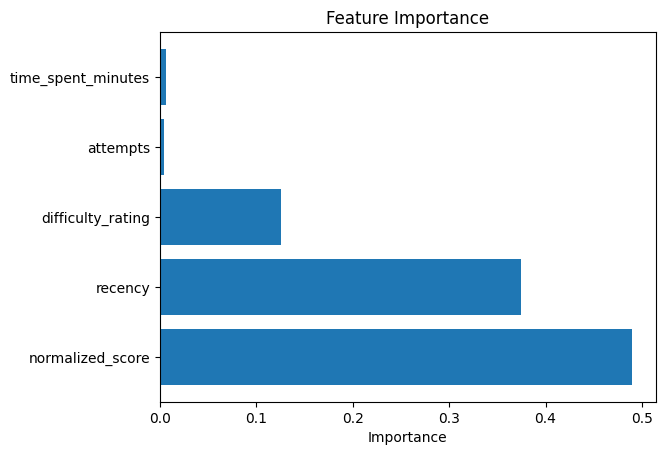

In [10]:
import matplotlib.pyplot as plt

importance = model.feature_importances_
features = X.columns

plt.figure()
plt.barh(features, importance)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.show()


## ✅ ML Training Summary

- Trained RandomForestRegressor on engineered features.
- Achieved low MAE & RMSE on validation set.
- Saved trained model to:
  - models/model.pkl
  - models/scaler.pkl
- Feature importance confirms recency, score & difficulty drive priority.
